In [1]:
# This is a code to implement multivariate linear regression on boston dataset from scratch

# ===================================Importing libraries====================================
import numpy as np                              #for handling arrays and matrices
import pandas as pd                             #for working with datasets and dataframes
import matplotlib.pyplot as plt

In [5]:
# loading dataset from sklearn
df = pd.read_csv('bike sharing hour.csv')
df.drop(['instant','dteday'],1,inplace=True)
full_data = df.astype(float).values.tolist()
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
# storing features in x and target variable in y
x = np.matrix(full_data)[:,:-1]
y = np.matrix(full_data)[:,-1]

In [116]:
#=================== MULTI-VARIATE LINEAR REGRESSION ===================

#================== INITIALISING HYPER-PARAMETERS ======================
# Hyper-parameters for a multi-variate linear regression are:
#  1. Theta (weights) which describe the line
#  2. epochs- number of times we run our linear regression to minimise the loss
#  3. alpha- the learning rate
# initialising theta with zeros
theta = np.zeros((1, x.shape[1] + 1)) #its dimensions are (1,14) because of the presence of a bias term (intercept)
print(theta.shape)
print(theta)

#Both epoch and alpha can be changed and tested on different numbers
# to minimise loss at a different rate(Advisable)
epoch = 15000 #1 EPOCH means 1 PASS over the WHOLE TRAINING DATA
alpha = 0.00001
#INCREASE EPOCHS AND OBSERVE THE COST
# creating bias vector x0
x0 = np.ones((x.shape[0], 1))
# forming input variable
X = np.concatenate((x0, x), axis = 1)
print(X.shape)

(1, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(17379, 15)


In [117]:
# ================================ DEFINING COST FUNCTION ================================
def cost_function(X, y, theta):
    h = X.dot(theta.T)
    loss = np.array(h - y)
    return np.sum(loss ** 2)/ (2 * len(X))

# For testing the function
cost = cost_function(X, y, theta)
print(cost)

34397.91475343806


In [118]:
# ============================ DEFINING GRADIENT DESCENT =========================
def grad_descent(X, y, theta, alpha):
    h = X.dot(theta.T)
    loss = h - y
    dj = (loss.T).dot(X)
    theta = theta - (alpha/len(X)) * dj
    return theta

# For testing the function 
cost = cost_function(X, y, theta)
print("Cost before: ", cost)

theta = grad_descent(X, y, theta, 0.0000001)

cost = cost_function(X, y, theta)
print("Cost after: ", cost)

Cost before:  34397.91475343806
Cost after:  34069.27841774834


In [119]:
# ========================== DEFINING OUR LINEAR REGRESSION =========================
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        if (ep+1)%1000 == 0:
            loss = cost_function(X, y, theta)
            print("Cost function: ", loss)
        
    return theta

theta = linear_reg(epoch, X, y, theta, alpha)

Cost function:  0.06598291215547025
Cost function:  0.010441594949059144
Cost function:  0.0016549286887159419
Cost function:  0.0002648092764159743
Cost function:  4.482235431158885e-05
Cost function:  9.95456873778526e-06
Cost function:  4.3771883882875906e-06
Cost function:  3.4377671056585744e-06
Cost function:  3.2358879660050657e-06
Cost function:  3.154139481139265e-06
Cost function:  3.094522689760658e-06
Cost function:  3.0412458637385867e-06
Cost function:  2.991553385292047e-06
Cost function:  2.9447785888023816e-06
Cost function:  2.9006084944694434e-06


In [120]:
theta

matrix([[ 8.57739948e-05,  1.29649641e-03,  1.33272251e-03,
         -2.88690518e-04,  6.48981153e-05,  1.48421388e-04,
          5.76784486e-04, -3.38983259e-03, -1.80298076e-03,
          1.71111253e-03,  1.51163762e-03, -1.08489974e-03,
          1.71632381e-04,  9.99972885e-01,  1.00000111e+00]])

In [121]:
# ========================= TESTING THE DATA ========================
def predict(X, theta):
    return X.dot(theta.T)

y_pred =  predict(X, theta)

In [122]:
# ====================== Find error in the predicted values=============
def mean_squared_error(h, y):
    m = y.shape[0]
    loss = np.array(h-y)
    return np.sum((loss ** 2 ) / m)

# for testing the function
# mean_squared_error(y_pred, y_test)

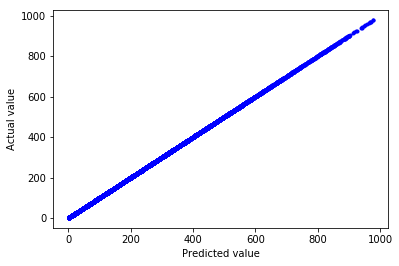

5.801216988938887e-06
2.9006084944694434e-06


In [123]:
# ================= Plotting hypothesis value vs actual value for train set=========
h = X.dot(theta.T)
plt.plot(h, y, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y))
print(cost_function(X, y, theta))